In [ ]:
%load_ext autoreload
%autoreload 2

In [103]:
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset import train_loader, test_loader, train_mean, train_std
from model import Net_ln
from utils import train, test, train_losses, test_losses, train_acc, test_acc
from wrong_classified import get_incorrect_preds, plot_incorrect_preds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_ln().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 34, 34]             512
             ReLU-10           [-1, 16, 34, 34]               0
        GroupNorm-11           [-1, 16, 34, 34]               0
          Dropout-12           [-1, 16, 34, 34]               0
        MaxPool2d-13           [-1, 16, 17, 17]               0
           Conv2d-14           [-1

In [14]:
EPOCHS = 20
model =  Net_ln().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=EPOCHS, steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.8881759643554688 Batch_id=390 Accuracy=22.72: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.8029, Accuracy: 3254/10000 (32.54%)

EPOCH: 2


Loss=1.5484049320220947 Batch_id=390 Accuracy=35.91: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.5294, Accuracy: 4379/10000 (43.79%)

EPOCH: 3


Loss=1.3427207469940186 Batch_id=390 Accuracy=46.67: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.2472, Accuracy: 5476/10000 (54.76%)

EPOCH: 4


Loss=1.0892751216888428 Batch_id=390 Accuracy=54.20: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.1624, Accuracy: 5860/10000 (58.60%)

EPOCH: 5


Loss=1.2194548845291138 Batch_id=390 Accuracy=58.83: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.0990, Accuracy: 6016/10000 (60.16%)

EPOCH: 6


Loss=1.1525121927261353 Batch_id=390 Accuracy=62.09: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.9775, Accuracy: 6494/10000 (64.94%)

EPOCH: 7


Loss=0.9107860326766968 Batch_id=390 Accuracy=64.30: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.9876, Accuracy: 6440/10000 (64.40%)

EPOCH: 8


Loss=0.8537267446517944 Batch_id=390 Accuracy=66.08: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.9342, Accuracy: 6667/10000 (66.67%)

EPOCH: 9


Loss=0.8647454977035522 Batch_id=390 Accuracy=67.77: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.8500, Accuracy: 6985/10000 (69.85%)

EPOCH: 10


Loss=0.8387678861618042 Batch_id=390 Accuracy=69.12: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.8725, Accuracy: 6926/10000 (69.26%)

EPOCH: 11


Loss=0.7244420051574707 Batch_id=390 Accuracy=70.46: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.8277, Accuracy: 7030/10000 (70.30%)

EPOCH: 12


Loss=0.6573801040649414 Batch_id=390 Accuracy=71.57: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.7792, Accuracy: 7259/10000 (72.59%)

EPOCH: 13


Loss=1.055593729019165 Batch_id=390 Accuracy=72.65: 100%|█| 391/391 [00:07<00:00



Test set: Average loss: 0.7565, Accuracy: 7367/10000 (73.67%)

EPOCH: 14


Loss=0.7568376660346985 Batch_id=390 Accuracy=73.88: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.7412, Accuracy: 7369/10000 (73.69%)

EPOCH: 15


Loss=0.6762140989303589 Batch_id=390 Accuracy=74.88: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.7053, Accuracy: 7543/10000 (75.43%)

EPOCH: 16


Loss=0.6404288411140442 Batch_id=390 Accuracy=75.28: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.7237, Accuracy: 7444/10000 (74.44%)

EPOCH: 17


Loss=0.6328451633453369 Batch_id=390 Accuracy=76.42: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6847, Accuracy: 7616/10000 (76.16%)

EPOCH: 18


Loss=0.5763172507286072 Batch_id=390 Accuracy=77.23: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6652, Accuracy: 7683/10000 (76.83%)

EPOCH: 19


Loss=0.6425771117210388 Batch_id=390 Accuracy=77.91: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6567, Accuracy: 7737/10000 (77.37%)

EPOCH: 20


Loss=0.5183485746383667 Batch_id=390 Accuracy=78.21: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6548, Accuracy: 7726/10000 (77.26%)



Text(0.5, 1.0, 'Test Accuracy')

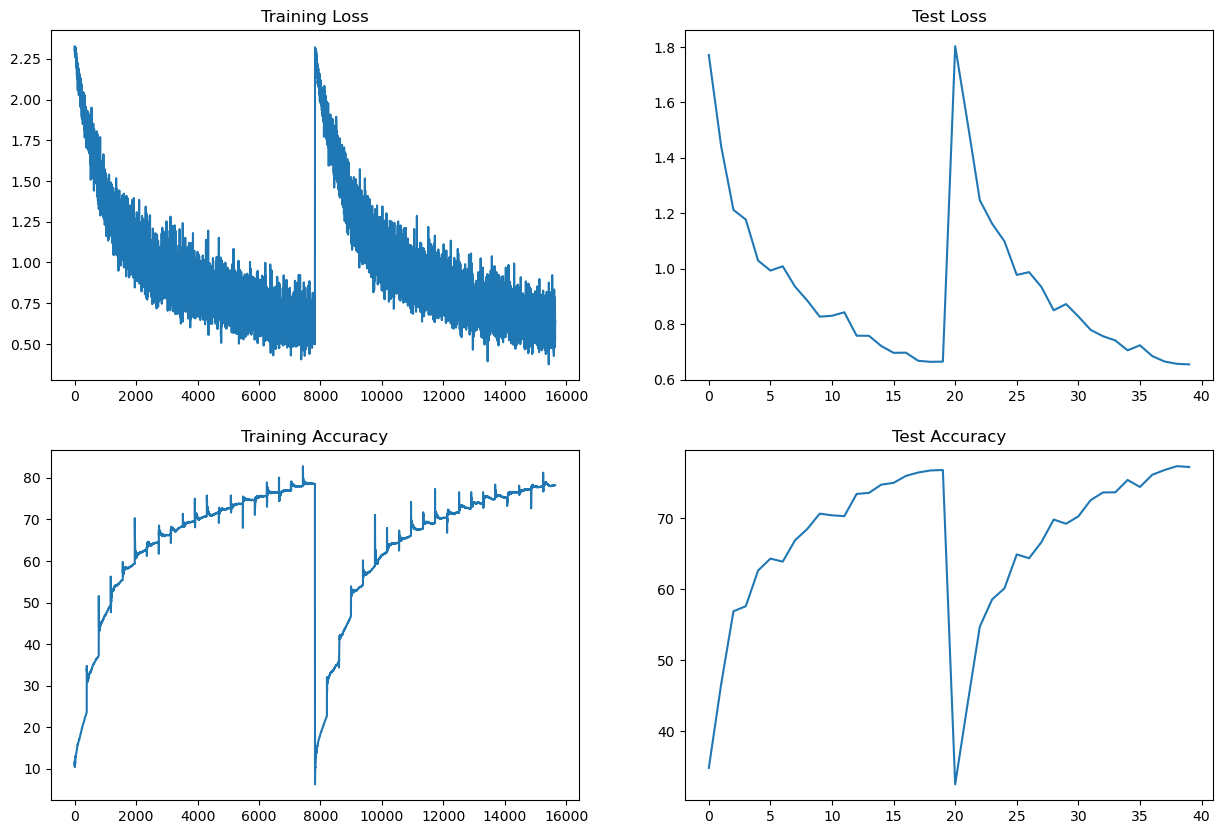

In [15]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Classes in order Actual and Predicted


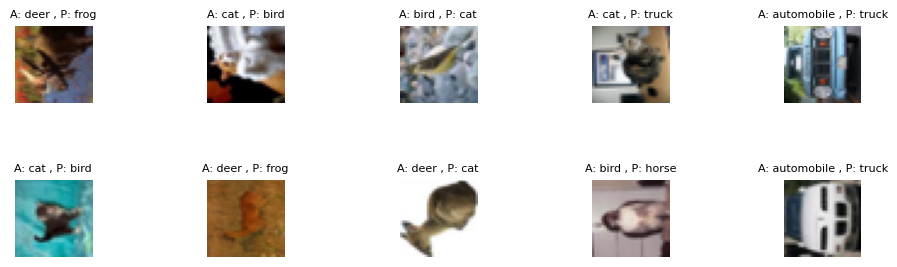

In [105]:
true_wrong, incorrect_examples, pred_wrong = get_incorrect_preds(model, test_loader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)